# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [M. Aziz Chusaini]
- **Email:** [mc211d5y1610@student.devacademy.id]
- **ID Dicoding:** [MC211D5Y1610]

## Menentukan Pertanyaan Bisnis

- How often are orders delivered late vs on time?
- What are the top-selling products by volume and revenue?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:


cust_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\customers_dataset.csv')
geo_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\geolocation_dataset.csv')
orditems_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\order_items_dataset.csv')
ordpayment_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\order_payments_dataset.csv')
ordreview_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\order_reviews_dataset.csv')
orders_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\orders_dataset.csv')
productcategory_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\product_category_name_translation.csv')
products_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\products_dataset.csv')
sellers_df = pd.read_csv('C:\\folder km banh\DBS\\submission\E-Commerce Public Dataset\sellers_dataset.csv')


In [4]:
# Merge orders dengan customers
new_order_df = pd.merge(
    left=orders_df,
    right=cust_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

# Merge dengan order_items
new_order_df = pd.merge(
    left=new_order_df,
    right=orditems_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

# Merge dengan payments
new_order_df = pd.merge(
    left=new_order_df,
    right=ordpayment_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

# Merge dengan reviews
new_order_df = pd.merge(
    left=new_order_df,
    right=ordreview_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Merge dengan products
new_order_df = pd.merge(
    left=new_order_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

# Merge dengan product category
new_order_df = pd.merge(
    left=new_order_df,
    right=productcategory_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Merge dengan sellers
new_order_df = pd.merge(
    left=new_order_df,
    right=sellers_df,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

In [5]:
new_order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118302,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,828.0,4.0,4950.0,40.0,10.0,40.0,baby,17602,tupa,SP
118303,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,8290,sao paulo,SP
118304,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175,ilicinea,MG
118305,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175,ilicinea,MG


In [6]:
new_order_df.sort_values(by='order_purchase_timestamp', ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
5326,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,69309,...,426.0,2.0,1400.0,32.0,6.0,28.0,furniture_decor,37580,monte siao,MG
5327,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,69309,...,754.0,3.0,1800.0,32.0,6.0,28.0,furniture_decor,37580,monte siao,MG
5166,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,4854e9b3feff728c13ee5fc7d1547e92,99025,...,381.0,1.0,700.0,25.0,2.0,25.0,telephony,81050,curitiba,PR
98671,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00,0eb1ee9dba87f5b36b4613a65074337c,2975,...,561.0,1.0,500.0,18.0,18.0,18.0,baby,5503,sao paulo,SP
110901,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,32ea3bdedab835c3aa6cb68ce66565ef,4106,...,1642.0,3.0,300.0,16.0,16.0,16.0,watches_gifts,85801,cascavel,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35815,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00,5c58de6fb80e93396e2f35642666b693,80045,...,112.0,1.0,13550.0,48.0,49.0,49.0,kitchen_dining_laundry_garden_furniture,82400,curitiba,PR
37544,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00,7febafa06d9d8f232a900a2937f04338,38600,...,394.0,1.0,1614.0,31.0,16.0,28.0,health_beauty,30111,belo horizonte,MG
82699,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00,b701bebbdf478f5500348f03aff62121,9541,...,429.0,1.0,450.0,28.0,9.0,19.0,party_supplies,1320,sao paulo,SP
104647,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,24ac2b4327e25baf39f2119e4228976a,13483,...,1127.0,2.0,450.0,16.0,4.0,20.0,computers_accessories,4102,sao paulo,SP


**Insight:**
- merging 9 data
- menampilkan data yang sudah di merge
- mengurutkan data berdasarkan waktu order

### Assessing Data

In [7]:
new_order_df.notna().sum()

order_id                         118307
customer_id                      118307
order_status                     118307
order_purchase_timestamp         118307
order_approved_at                118292
order_delivered_carrier_date     117053
order_delivered_customer_date    115719
order_estimated_delivery_date    118307
customer_unique_id               118307
customer_zip_code_prefix         118307
customer_city                    118307
customer_state                   118307
order_item_id                    118307
product_id                       118307
seller_id                        118307
shipping_limit_date              118307
price                            118307
freight_value                    118307
payment_sequential               118307
payment_type                     118307
payment_installments             118307
payment_value                    118307
review_id                        117329
review_score                     117329
review_comment_title              13892


In [8]:
new_order_df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                           978
review_score                        978
review_comment_title             104415


In [9]:
new_order_df.nunique()

order_id                         98665
customer_id                      98665
order_status                         7
order_purchase_timestamp         98111
order_approved_at                90173
order_delivered_carrier_date     81016
order_delivered_customer_date    95663
order_estimated_delivery_date      449
customer_unique_id               95419
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93317
price                             5968
freight_value                     6999
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28938
review_id                        97708
review_score                         5
review_comment_title              4497
review_comment_message   

In [10]:
new_order_df.duplicated().sum()

np.int64(0)

**Insight:**
- tidak ada duplikasi data
- review_comment_title memiliki 104415 data null

### Cleaning Data

In [11]:
new_order_df.dropna(axis=0, inplace=True)

In [12]:
new_order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_nam

In [13]:
new_order_df['order_purchase_timestamp'] = pd.to_datetime(new_order_df.order_purchase_timestamp)
new_order_df['order_delivered_carrier_date'] = pd.to_datetime(new_order_df.order_delivered_carrier_date)
new_order_df['order_delivered_customer_date'] = pd.to_datetime(new_order_df.order_delivered_customer_date)
new_order_df['order_estimated_delivery_date'] = pd.to_datetime(new_order_df.order_estimated_delivery_date)
new_order_df['shipping_limit_date'] = pd.to_datetime(new_order_df.shipping_limit_date)
new_order_df['review_answer_timestamp'] = pd.to_datetime(new_order_df.review_answer_timestamp)


In [14]:
new_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11578 entries, 3 to 118288
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11578 non-null  object        
 1   customer_id                    11578 non-null  object        
 2   order_status                   11578 non-null  object        
 3   order_purchase_timestamp       11578 non-null  datetime64[ns]
 4   order_approved_at              11578 non-null  object        
 5   order_delivered_carrier_date   11578 non-null  datetime64[ns]
 6   order_delivered_customer_date  11578 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11578 non-null  datetime64[ns]
 8   customer_unique_id             11578 non-null  object        
 9   customer_zip_code_prefix       11578 non-null  int64         
 10  customer_city                  11578 non-null  object        
 11  customer_state     

**Insight:**
- data kosong di drop agar tidak mempengaruhi analysis atau outlier
- mengganti Dtype order_purchase_timestamp dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
new_order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,11578,11578,11578,11578,11578,11578,11578,11578,11578,11578.000000,...,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578,11578.000000,11578,11578
unique,9436,9436,1,NaN,8986,NaN,NaN,NaN,9333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,375,18
top,37ee401157a3a0b28c9c6d0ed8c3b24b,7d321bd4e8ba1caf74c4c1aabd9ae524,delivered,NaN,2018-06-08 19:31:06,NaN,NaN,NaN,7582a5a77fc2976628f46a13ec91b375,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,NaN,sao paulo,SP
freq,13,13,11578,NaN,14,NaN,NaN,NaN,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1203,NaN,3068,8398
mean,NaN,NaN,NaN,2018-06-16 03:49:52.208757760,NaN,2018-06-19 02:37:43.395145728,2018-06-26 19:11:59.764467200,2018-07-09 00:00:44.774572288,NaN,33922.288996,...,815.354465,2.209363,2120.935222,28.980912,16.566937,22.485922,NaN,23388.328900,NaN,NaN
min,NaN,NaN,NaN,2017-05-04 19:35:21,NaN,2017-05-09 16:53:19,2017-05-15 15:48:06,2017-06-07 00:00:00,NaN,1003.000000,...,4.000000,1.000000,0.000000,11.000000,2.000000,7.000000,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,2018-05-10 10:58:31.500000,NaN,2018-05-14 08:04:15,2018-05-20 22:36:21,2018-06-01 00:00:00,NaN,11021.250000,...,366.000000,1.000000,292.000000,18.000000,8.000000,15.000000,NaN,5849.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-06-14 21:37:00,NaN,2018-06-18 14:26:00,2018-06-25 15:17:13,2018-07-16 00:00:00,NaN,23520.000000,...,634.000000,1.000000,650.000000,23.000000,13.000000,20.000000,NaN,13405.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-07-24 16:15:19,NaN,2018-07-27 09:12:15,2018-08-02 18:20:14,2018-08-13 00:00:00,NaN,55608.000000,...,1031.000000,3.000000,1800.000000,35.000000,20.000000,29.000000,NaN,24451.000000,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 14:18:28,NaN,2018-09-03 12:56:00,2018-10-02 00:18:50,2018-10-23 00:00:00,NaN,99980.000000,...,3985.000000,17.000000,30000.000000,105.000000,105.000000,105.000000,NaN,99730.000000,NaN,NaN


array([[<Axes: title={'center': 'order_purchase_timestamp'}>,
        <Axes: title={'center': 'order_delivered_carrier_date'}>,
        <Axes: title={'center': 'order_delivered_customer_date'}>,
        <Axes: title={'center': 'order_estimated_delivery_date'}>,
        <Axes: title={'center': 'customer_zip_code_prefix'}>],
       [<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'shipping_limit_date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>,
        <Axes: title={'center': 'payment_sequential'}>],
       [<Axes: title={'center': 'payment_installments'}>,
        <Axes: title={'center': 'payment_value'}>,
        <Axes: title={'center': 'review_score'}>,
        <Axes: title={'center': 'review_answer_timestamp'}>,
        <Axes: title={'center': 'product_name_lenght'}>],
       [<Axes: title={'center': 'product_description_lenght'}>,
        <Axes: title={'center': 'product_photos_qty'}>,
        <Axes: tit

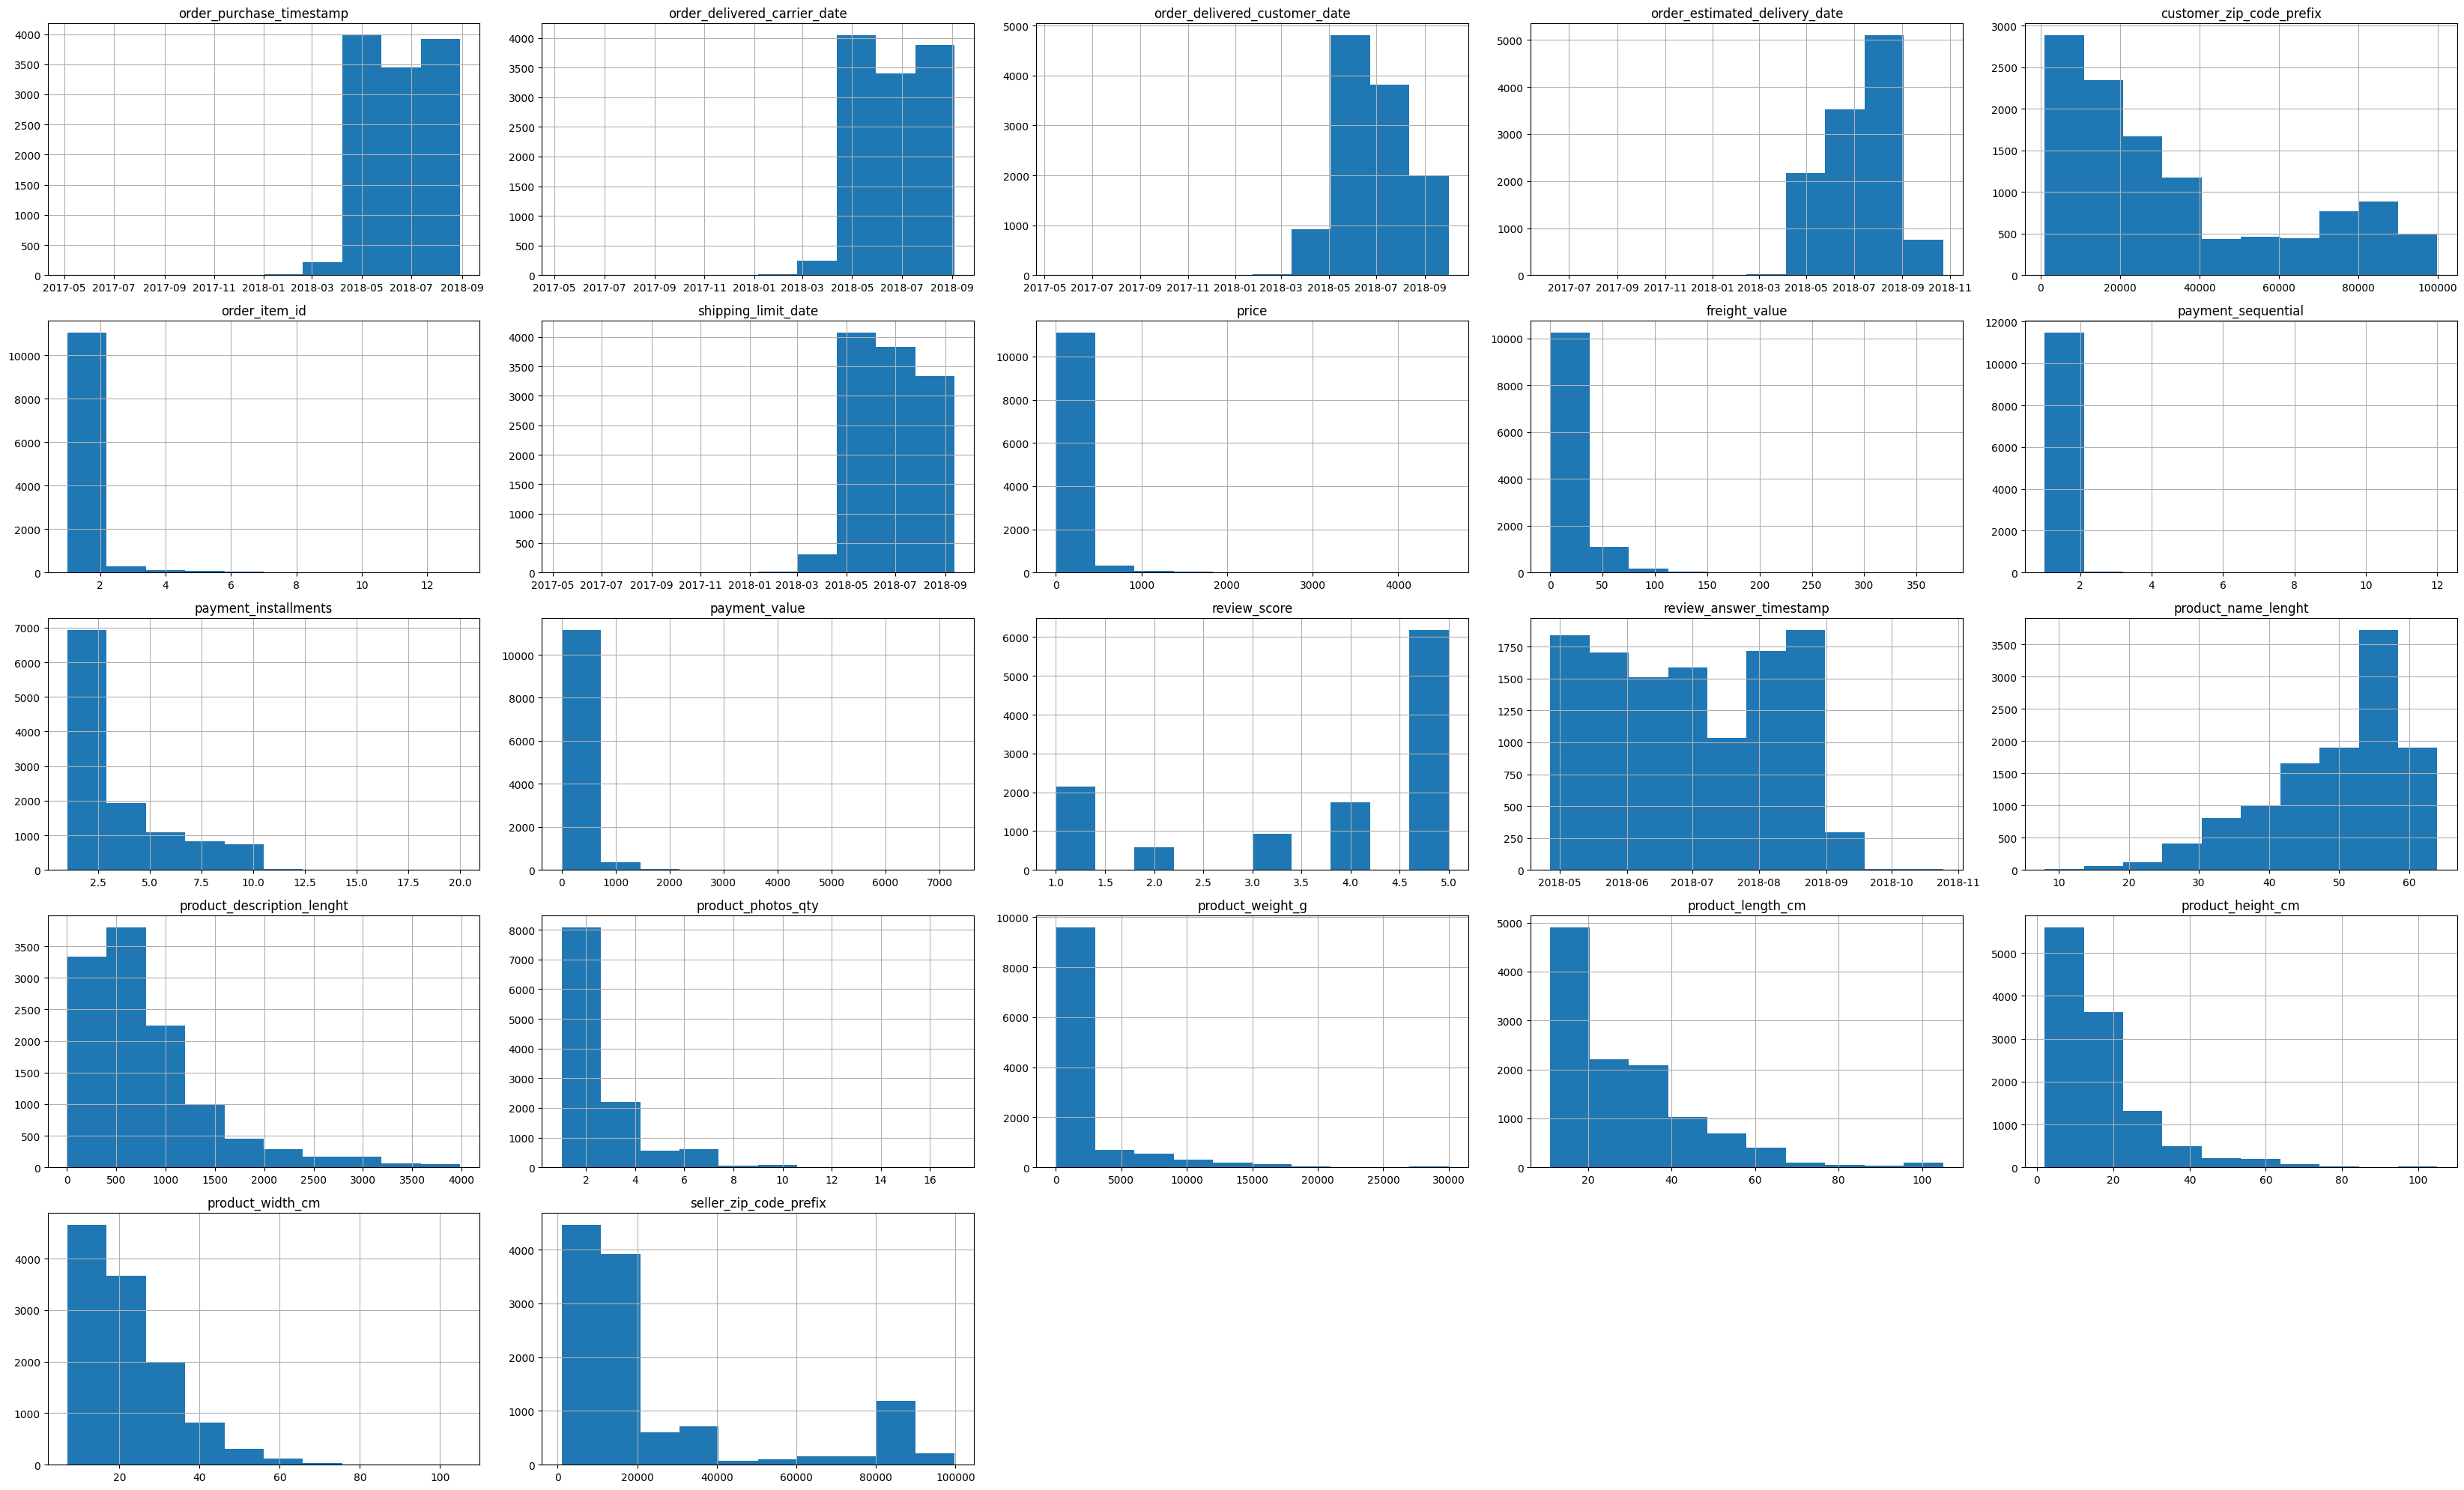

In [ ]:
new_order_df.hist(figsize=(33, 20))

In [17]:
new_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11578 entries, 3 to 118288
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11578 non-null  object        
 1   customer_id                    11578 non-null  object        
 2   order_status                   11578 non-null  object        
 3   order_purchase_timestamp       11578 non-null  datetime64[ns]
 4   order_approved_at              11578 non-null  object        
 5   order_delivered_carrier_date   11578 non-null  datetime64[ns]
 6   order_delivered_customer_date  11578 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11578 non-null  datetime64[ns]
 8   customer_unique_id             11578 non-null  object        
 9   customer_zip_code_prefix       11578 non-null  int64         
 10  customer_city                  11578 non-null  object        
 11  customer_state     

In [18]:
pivot_table = new_order_df.groupby(by=['order_status', 'payment_type']).agg({
    'price': 'mean',
    'freight_value': ['mean', 'max', 'min']
}).reset_index()
pivot_table

order_status payment_type       price freight_value             
                                   mean          mean     max  min
0    delivered       boleto  107.407592     21.165343  375.28  0.0
1    delivered  credit_card  136.702508     22.128965  321.88  0.0
2    delivered   debit_card  131.157331     21.523119  174.45  0.0
3    delivered      voucher  127.797129     23.401030  108.32  0.0

In [44]:
aggregasi = new_order_df.describe()
aggregasi

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,...,review_score,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,11578,11578,11578,11578,11578.000000,11578.00000,11578,11578.000000,11578.000000,11578.000000,...,11578.000000,11578,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000
mean,2018-06-16 03:49:52.208757760,2018-06-19 02:37:43.395145728,2018-06-26 19:11:59.764467200,2018-07-09 00:00:44.774572288,33922.288996,1.25013,2018-06-22 05:42:38.563741696,130.889616,21.994643,1.057091,...,3.794179,2018-06-30 04:12:38.328726784,49.283641,815.354465,2.209363,2120.935222,28.980912,16.566937,22.485922,23388.328900
min,2017-05-04 19:35:21,2017-05-09 16:53:19,2017-05-15 15:48:06,2017-06-07 00:00:00,1003.000000,1.00000,2017-05-12 02:15:56,0.850000,0.000000,1.000000,...,1.000000,2018-04-26 12:56:00,8.000000,4.000000,1.000000,0.000000,11.000000,2.000000,7.000000,1001.000000
25%,2018-05-10 10:58:31.500000,2018-05-14 08:04:15,2018-05-20 22:36:21,2018-06-01 00:00:00,11021.250000,1.00000,2018-05-16 12:55:39.249999872,40.800000,12.912500,1.000000,...,3.000000,2018-05-23 13:10:47.249999872,43.000000,366.000000,1.000000,292.000000,18.000000,8.000000,15.000000,5849.000000
50%,2018-06-14 21:37:00,2018-06-18 14:26:00,2018-06-25 15:17:13,2018-07-16 00:00:00,23520.000000,1.00000,2018-06-20 14:09:25.500000,79.000000,18.230000,1.000000,...,5.000000,2018-06-28 11:09:52,52.000000,634.000000,1.000000,650.000000,23.000000,13.000000,20.000000,13405.000000
75%,2018-07-24 16:15:19,2018-07-27 09:12:15,2018-08-02 18:20:14,2018-08-13 00:00:00,55608.000000,1.00000,2018-07-31 03:25:14.249999872,139.000000,23.350000,1.000000,...,5.000000,2018-08-05 17:11:38.500000,57.000000,1031.000000,3.000000,1800.000000,35.000000,20.000000,29.000000,24451.000000
max,2018-08-29 14:18:28,2018-09-03 12:56:00,2018-10-02 00:18:50,2018-10-23 00:00:00,99980.000000,13.00000,2018-09-12 13:24:27,4590.000000,375.280000,12.000000,...,5.000000,2018-10-24 21:34:38,64.000000,3985.000000,17.000000,30000.000000,105.000000,105.000000,105.000000,99730.000000
std,NaN,NaN,NaN,NaN,29031.060991,0.77757,NaN,210.511516,18.720550,0.379266,...,1.564775,NaN,9.741598,646.220657,1.698805,3759.594294,15.313693,13.191465,11.021578,26935.545826


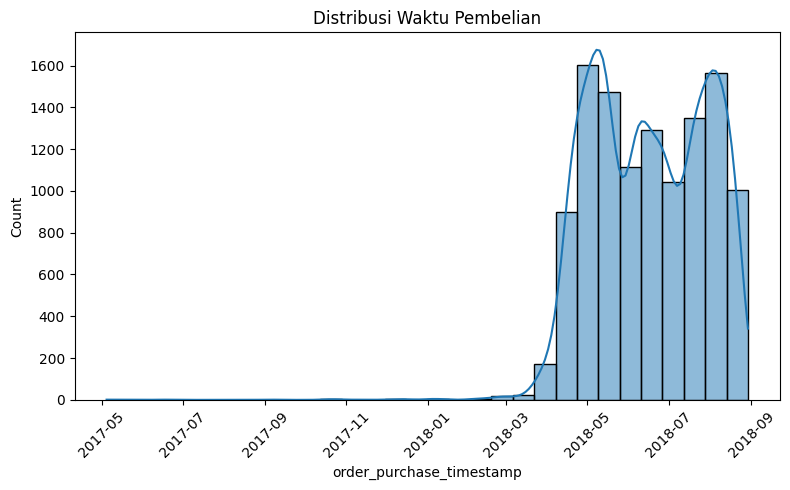

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(new_order_df['order_purchase_timestamp'], kde=True, bins=30)
plt.title('Distribusi Waktu Pembelian')
plt.xticks(rotation=45)
plt.show()

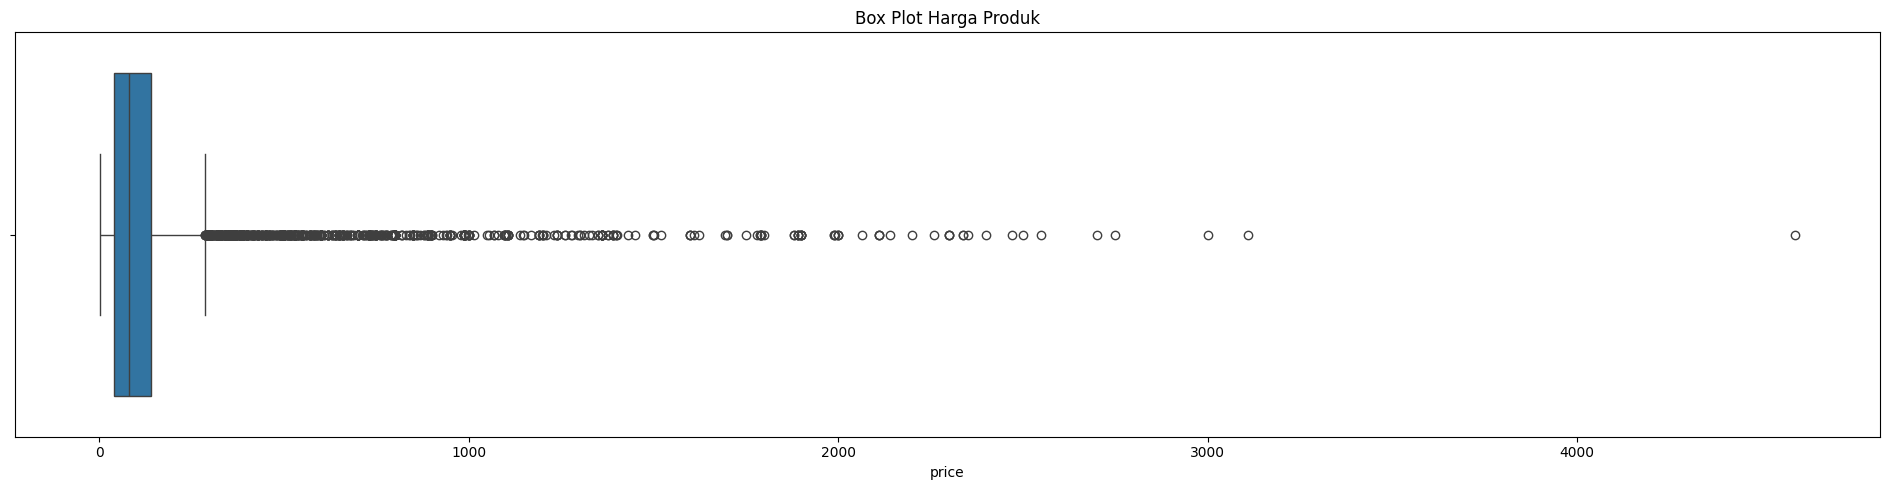

In [47]:
plt.figure(figsize=(19, 5))
sns.boxplot(x=new_order_df['price'])
plt.title('Box Plot Harga Produk')
plt.show()

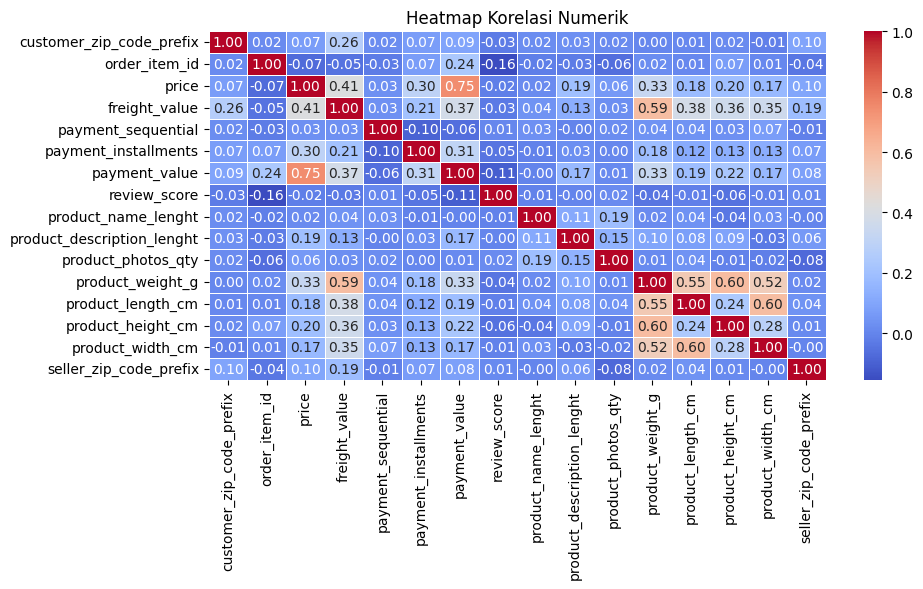

In [50]:
numeric_df = new_order_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Numerik')
plt.show()

**Insight:**
- Dari heatmap, terlihat bahwa terdapat korelasi positif yang cukup tinggi antara product_weight_g dan product_length_cm, product_height_cm, serta product_width_cm. Ini menunjukkan bahwa semakin berat sebuah produk, maka kemungkinan besar dimensinya juga lebih besar.
- Sebaliknya, korelasi antara price dan review_score terlihat cukup rendah, yang berarti harga produk tidak terlalu berpengaruh terhadap skor ulasan pelanggan.
- Distribusi waktu pembelian menunjukkan adanya peningkatan signifikan dalam jumlah pesanan mulai dari Maret 2018 hingga Agustus 2018. Hal ini mungkin dipengaruhi oleh faktor musiman atau strategi pemasaran tertentu yang meningkatkan aktivitas pembelian pada periode tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [19]:
#melihat jumlah order yang terlambat (true) dan tidak terlambat (false)
new_order_df['is_late'] = new_order_df['order_delivered_customer_date'] > new_order_df['order_estimated_delivery_date']
delivery_counts = new_order_df['is_late'].value_counts()
delivery_counts

is_late
False    10667
True       911
Name: count, dtype: int64

In [20]:
#meghitung persentase order yang terlambat
delivery_percentages = delivery_counts / len(new_order_df) * 100
delivery_percentages

is_late
False    92.131629
True      7.868371
Name: count, dtype: float64

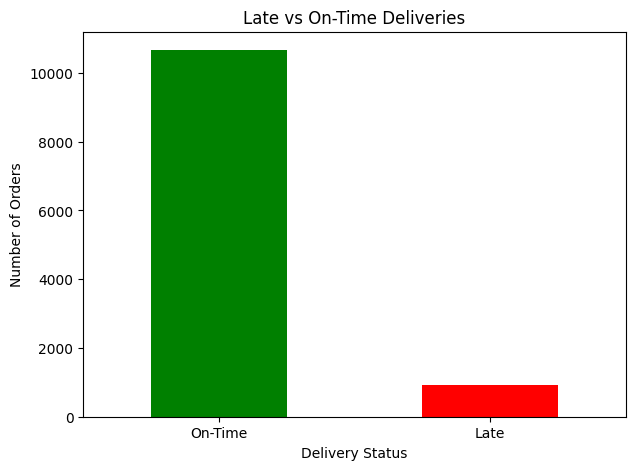

In [21]:
delivery_counts = new_order_df['is_late'].value_counts()

delivery_counts.plot(kind='bar', color=['green', 'red'], figsize=(7, 5))
plt.title("Late vs On-Time Deliveries")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.xticks(ticks=[0, 1], labels=['On-Time', 'Late'], rotation=0)
plt.show()

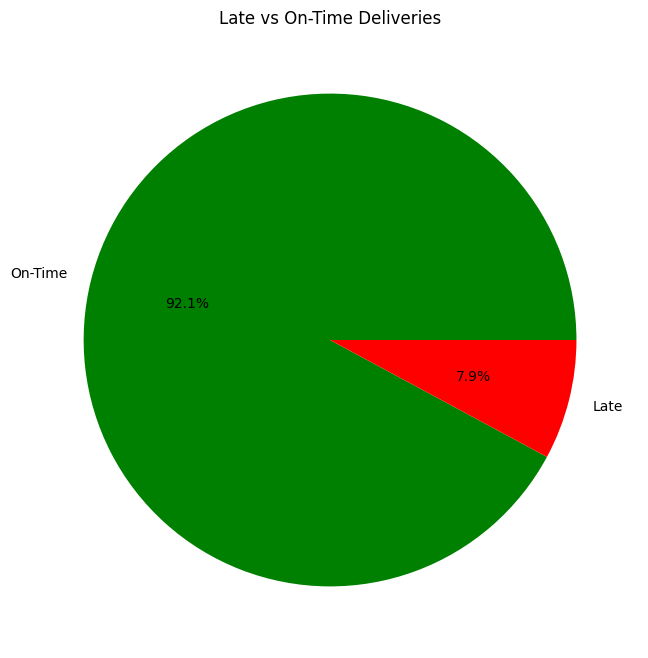

In [22]:
# Pie chart
custom_labels = ['On-Time', 'Late']
delivery_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(8, 8), labels=custom_labels)
plt.title("Late vs On-Time Deliveries")
plt.ylabel("") 
plt.show()

**Insight**
- Mayoritas pesanan dikirim tepat waktu, menunjukkan efisiensi logistik yang baik. Namun, pengiriman yang terlambat masih mewakili persentase yang cukup besar. Sangat penting untuk menyelidiki potensi kemacetan, seperti keterlambatan pengiriman atau pemrosesan, untuk meminimalkan keterlambatan pengiriman lebih lanjut.
- Keterlambatan pengiriman dapat memengaruhi kepuasan dan loyalitas pelanggan dari waktu ke waktu. Mengidentifikasi pola-seperti wilayah tertentu, waktu tertentu, atau kategori produk yang terkait dengan keterlambatan pengiriman-dapat membantu dalam mengimplementasikan solusi yang ditargetkan untuk meningkatkan keandalan.

### Pertanyaan 2:

In [23]:
# menghitung volume penjualan
product_volume = new_order_df.groupby('product_id')['order_item_id'].count().sort_values(ascending=False)

# Display top 5 volume penjualan
print("Top Products by Volume:")
print(product_volume.head())


Top Products by Volume:
product_id
53b36df67ebb7c41585e8d54d6772e08    70
19c91ef95d509ea33eda93495c4d3481    59
3fbc0ef745950c7932d5f2a446189725    55
422879e10f46682990de24d770e7f83d    47
a92930c327948861c015c919a0bcb4a8    43
Name: order_item_id, dtype: int64


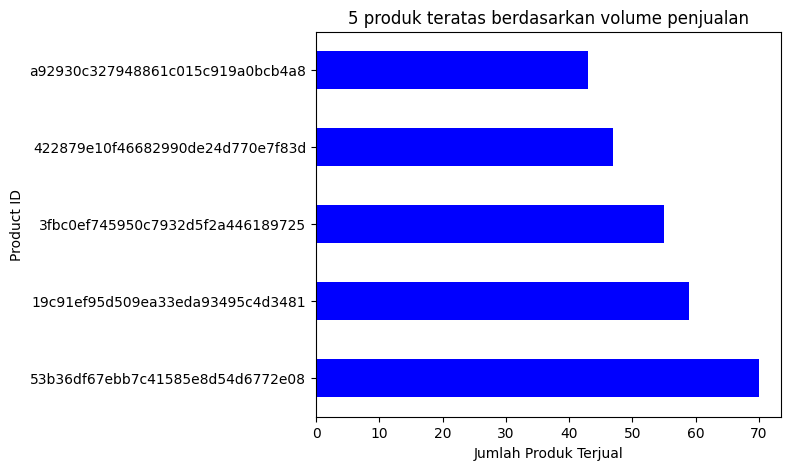

In [24]:
top_volume = new_order_df.groupby('product_id')['order_item_id'].count().sort_values(ascending=False).head(5)
top_volume.plot(kind='barh', color='blue', figsize=(6, 5))
plt.title("5 produk teratas berdasarkan volume penjualan")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Product ID")
plt.show()

In [25]:
# menghitung revenue
product_revenue = new_order_df.groupby('product_id')['price'].sum().sort_values(ascending=False)

# Display top 5 revenue product
print("\nTop Products by Revenue:")
print(product_revenue.head())


Top Products by Revenue:
product_id
25c38557cf793876c5abdd5931f922db    14417.95
066bbc3a1363adc4d73e093aefd9363a     9520.14
16c4e87b98a9370a9cbc3a4658a3f45b     9486.00
bb50f2e236e5eea0100680137654686c     8250.00
53b36df67ebb7c41585e8d54d6772e08     7392.30
Name: price, dtype: float64


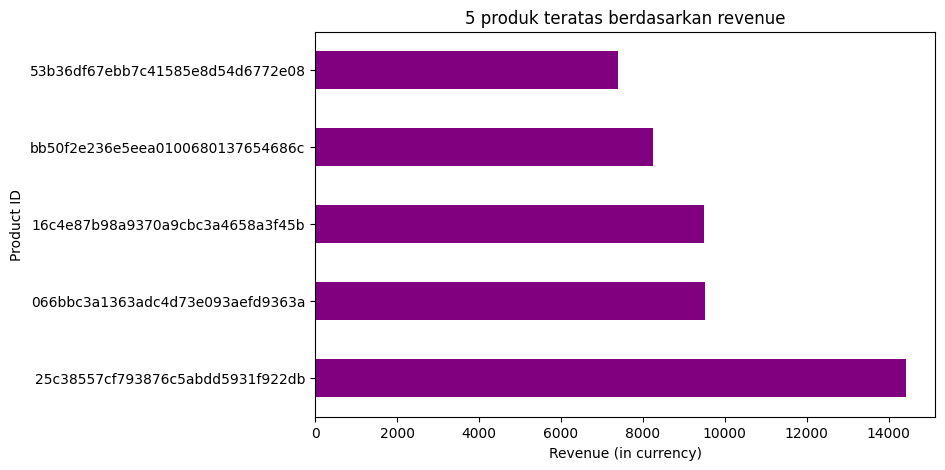

In [26]:
top_revenue = new_order_df.groupby('product_id')['price'].sum().sort_values(ascending=False).head(5)
top_revenue.plot(kind='barh', color='purple', figsize=(8, 5))
plt.title("5 produk teratas berdasarkan revenue")
plt.xlabel("Revenue (in currency)")
plt.ylabel("Product ID")
plt.show()

**Insight:**
- Dapat dilihat, produk dengan ID 53b36df67ebb7c41585e8d54d6772e08 memiliki volume penjualan tertinggi, dengan 70 unit terjual. Hal ini menunjukkan bahwa produk ini adalah yang paling populer dalam hal jumlah yang terjual di antara 5 produk teratas.
- sedangkan produk dengan ID 25c38557cf793876c5abdd5931f922db menghasilkan pendapatan tertinggi, dengan total mata uang sebesar 14417,95. Hal ini menunjukkan bahwa meskipun produk tersebut mungkin bukan produk terlaris berdasarkan volume penjualan, produk tersebut berkontribusi secara signifikan terhadap pendapatan keseluruhan, mungkin karena harga yang lebih tinggi atau posisi premium.

## Analisis Lanjutan (Opsional)

## Conclusion

- Delivery performance  
  Dengan 92% pesanan yang dikirim tepat waktu, sistem ini dapat diandalkan tetapi membutuhkan peningkatan yang ditargetkan untuk mengatasi 8% pengiriman yang terlambat untuk meningkatkan kepuasan pelanggan.

- Product insight  
  Produk terlaris berdasarkan volume (ID: 53b36df67ebb7c41585e8d54d6772e08) dan produk penghasil pendapatan tertinggi (ID: 25c38557cf793876c5abdd5931f922db) mengindikasikan pola permintaan yang berbeda. Memprioritaskan stok dan pemasaran untuk kedua item tersebut dapat memaksimalkan pendapatan dan memenuhi kebutuhan pelanggan.


**Key insights**
- Mengoptimalkan tingkat stok dan strategi pemasaran untuk produk terlaris dan berpenghasilan tinggi dapat meningkatkan penjualan dan pendapatan.
- Mengatasi masalah keterlambatan pengiriman akan meningkatkan efisiensi operasional dan kepuasan pelanggan, yang berpotensi memengaruhi pembelian berulang dan kinerja secara keseluruhan.

In [29]:
new_order_df.to_csv("dashboard/all_data.csv", index=False)